In [1]:
import json
import glob

def lire_json(chemin):
    with open(chemin, "r", encoding="utf-8") as fin:
        dic = json.load(fin)
    return dic

def ecrire_json(chemin, dic):
    with open(chemin, "w", encoding="utf-8") as fout:
        fout.write(json.dumps(dic, ensure_ascii=False, indent=2))

In [2]:
with open("articlesTags.json", "r", encoding="utf-8") as fin:
    dic = json.load(fin)

print(len(dic))

5685


In [3]:
new_dic = {}

for k, v in dic.items():
    mots = []
    tags = []
    for mot, tag in v[1]:
        mots.append(mot)
        tags.append(tag)
    new_dic[k] = []
    new_dic[k].append(mots)
    new_dic[k].append(tags)
    new_dic[k].append(v[0])
    
print(len(new_dic))

for k, v in new_dic.items():
    print(k, v)
    break

5685
french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498 [['Identification', 'de', 'trois', 'gènes', 'expliquant', 'la', 'virulence', 'de', 'la', 'grippe', 'espagnole', 'de', '1918'], ['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], 'Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918']


In [4]:
articles = [x for x in new_dic.keys()]
print(articles[0])

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

print(liste_tags[:3])
print(liste_titres[:3])

french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498
[['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], ['NNP', 'NNS', 'VBP', 'NN', ':', 'IN', 'NNS', 'VBP', 'JJR', 'NN', 'NN', 'NN', 'JJ', 'NN'], ['NNP', 'FW', 'FW', '.', 'NNS', 'NNS', ':']]
['Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918', 'Les chantiers du Président : On ne peut cacher le soleil avec un tamis', 'Gueule de bois ? Quelques remèdes...']


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

V = CountVectorizer()

liste_t = [" ".join(x) for x in liste_tags]

print(liste_tags[0])
print(liste_t[:3])

X = V.fit_transform(liste_t).toarray()

print(X[:3])
print(len(X))

['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD']
['NNP FW FW NNS VBP JJ NN IN FW JJ FW IN CD', 'NNP NNS VBP NN : IN NNS VBP JJR NN NN NN JJ NN', 'NNP FW FW . NNS NNS :']
[[0 1 0 0 4 2 2 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 1 0 0 5 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
5685


In [8]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

In [9]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X) 

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                    'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_

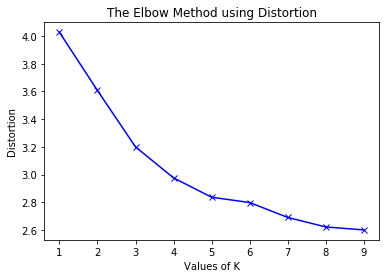

In [11]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

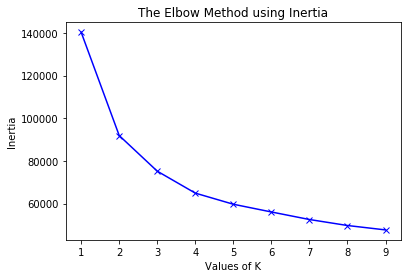

In [12]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()